In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error,mean_squared_error

Load Datasets

In [2]:
#predicted datasets
svm=pd.read_csv (r'C:\Users\Manos\Desktop\SVM_FI_LSTM',sep='\t',low_memory=False)
rf=pd.read_csv (r'C:\Users\Manos\Desktop\rf_FI_LSTM',sep='\t',low_memory=False)
gbdt=pd.read_csv (r'C:\Users\Manos\Desktop\gbdt_FI_LSTM',sep='\t',low_memory=False)
dnn=pd.read_csv (r'C:\Users\Manos\Desktop\DNN_FI_LSTM',sep='\t',low_memory=False)
lr=pd.read_csv (r'C:\Users\Manos\Desktop\lr_FI_LSTM',sep='\t',low_memory=False)

Load Real FIs

In [3]:
wave8=pd.read_csv (r'C:\Users\Manos\OneDrive\My_thesis\prepared_data\Frailty_Indices\Frailty_Index_Wave_8.tab',sep='\t',low_memory=False)

In [4]:
arr=np.array(svm.idauniq)
wave8commonFI = wave8[wave8.idauniq.isin(arr)]#common ids from wave 8

In [5]:
arr1=np.array(wave8commonFI.idauniq)

In [6]:
svm = svm[svm.idauniq.isin(arr1)]#common ids from wave 8
lr = lr[lr.idauniq.isin(arr1)]#common ids from wave 8
dnn = dnn[dnn.idauniq.isin(arr1)]#common ids from wave 8
rf = rf[rf.idauniq.isin(arr1)]#common ids from wave 8
gbdt = gbdt[gbdt.idauniq.isin(arr1)]#common ids from wave 8

In [7]:
dnn.shape

(560, 2)

Wave 8

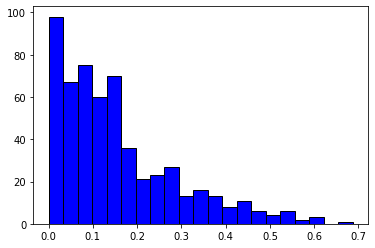

In [8]:
plt.hist(wave8commonFI['FI'], color = 'blue', edgecolor = 'black',
         bins = int(21))
plt.savefig(r'C:\Users\Manos\Desktop\wave8_564fi.png')
plt.show()


In [9]:
plt.show()

In [10]:
def measurments(model):
    plt.hist(model['FI'], color = 'blue', edgecolor = 'black',
         bins = int(21))
    plt.show()
    mse=mean_squared_error(wave8commonFI['FI'], model['FI'])
    mae = mean_absolute_error(wave8commonFI['FI'], model['FI'])
    mape = mean_absolute_percentage_error(wave8commonFI['FI'], model['FI'])
    r2=r2_score(wave8commonFI['FI'], model['FI'])
    adjr2=1-(((1-r2)*(560-1))/((560-24-1)))
    print('MSE: %.3f' % mse)
    print('MAE: %.3f' % mae)
    print('MAPE: %.3f' % mape)
    print('r2: %.3f' % r2)
    print('adjr2: %.3f' % adjr2)

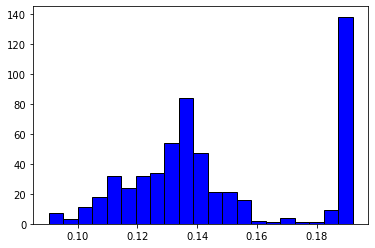

MSE: 0.019
MAE: 0.107
MAPE: 20431877709526.848
r2: -0.074
adjr2: -0.122


In [11]:
# measurments(svm)
#measurments(rf)
measurments(gbdt)
#measurments(dnn)
#measurments(lr)

In [12]:
r = np.arange(6)
print()

In [13]:
pyplot.hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
pyplot.hist(svm['FI'], 21, alpha=0.5, label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

NameError: name 'pyplot' is not defined

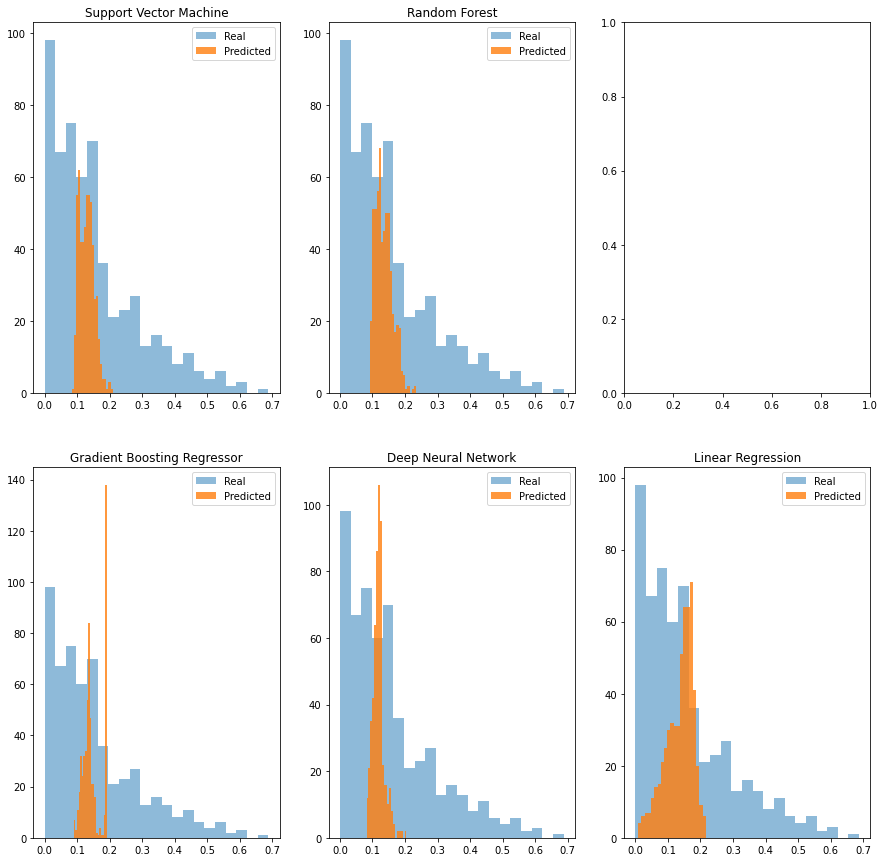

In [14]:
fig, axs = plt.subplots(2, 3,figsize=(15,15))
axs[0,0].hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
axs[0,0].hist(svm['FI'], 21, alpha=0.8, label='Predicted')
axs[0,0].legend(loc='upper right')
axs[0,0].set_title('Support Vector Machine')
axs[0,1].hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
axs[0,1].hist(rf['FI'], 21, alpha=0.8, label='Predicted')
axs[0,1].legend(loc='upper right')
axs[0,1].set_title('Random Forest')
axs[1,0].hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
axs[1,0].hist(gbdt['FI'], 21, alpha=0.8, label='Predicted')
axs[1,0].legend(loc='upper right')
axs[1,0].set_title('Gradient Boosting Regressor')
axs[1,1].hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
axs[1,1].hist(dnn['FI'], 21, alpha=0.8, label='Predicted')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Deep Neural Network')
axs[1,2].hist(wave8commonFI['FI'], 21, alpha=0.5, label='Real')
axs[1,2].hist(lr['FI'], 21, alpha=0.8, label='Predicted')
axs[1,2].legend(loc='upper right')
axs[1,2].set_title('Linear Regression')
plt.savefig(r'C:\Users\Manos\Desktop\FI_all_models.png')